In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath

from scipy.fftpack import fft
from scipy.fftpack import ifft

In [2]:
def step(x):
    N = 512
    if x < N/2:
        return 1
    else: 
        return 0

In [3]:
def saw(x):
    N = 512
    if x < N/2:
        return x/(N/2)
    else:
        return (x - N/2)/(N/2)

In [4]:
def delta(x):
    N = 512
    if x < N/2:
        return x/(N/2)
    else:
        return (N/2 - x) * 2/N + 1

In [5]:
with open("cardio06.txt") as file:
    cardio = [row.strip() for row in file]

In [6]:
m = []
m2 = []
for i in range(len(cardio)):
    m = m + cardio[i].split("  ")
for i in range(len(m)):
    m2 = m2 + m[i].split(" ")
cardio = [int(x) for x in m2]

In [7]:
with open("reo06.txt") as file:
    reo = [row.strip() for row in file]

In [8]:
m = []
m2 = []
for i in range(len(reo)):
    m = m + reo[i].split("  ")
for i in range(len(m)):
    m2 = m2 + m[i].split(" ")
reo = [int(x) for x in m2]

In [9]:
with open("spiro06.txt") as file:
    spiro = [row.strip() for row in file]

In [10]:
m = []
for i in range(len(spiro)):
    m = m + spiro[i].split("\n")
spiro = [int(x) for x in m]

In [11]:
with open("velo06.txt") as file:
    velo = [row.strip() for row in file]

In [12]:
m = []
for i in range(len(velo)):
    m = m + velo[i].split("\n")
velo = [int(x) for x in m]

In [13]:
cardio2 = cardio[:512]

In [14]:
reo2 = reo[:512]

In [15]:
spiro2 = spiro[:512]

In [16]:
velo2 = velo[:2048]

# Задание №1 

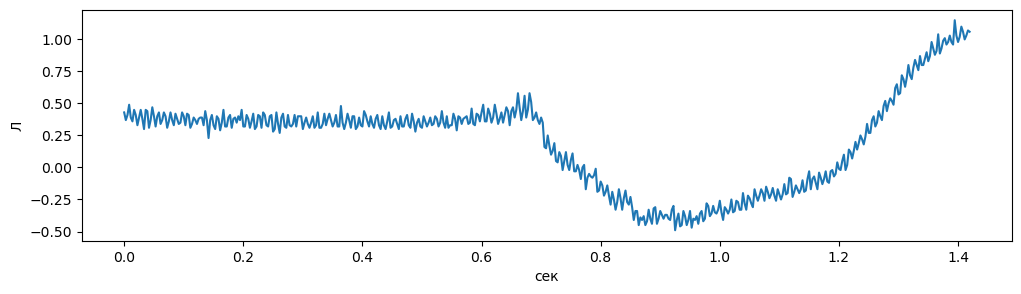

In [17]:
X = list(range(0, len(spiro2)))
X = [float(X[i])/360 for i in X]
for i in range(len(spiro2)):
    Y = [(float(x)-512)/100 for x in spiro2]
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.xlabel('сек')
plt.ylabel('Л')
plt.show()

# Задание №2

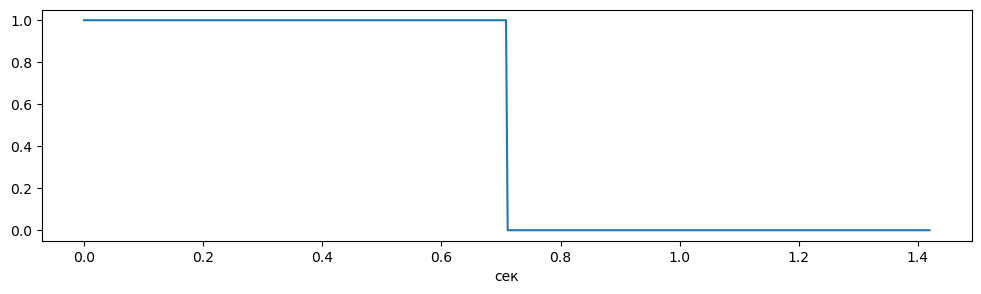

In [18]:
X = list(range(0, 512))
Y = [step(x) for x in X]
X = [float(X[i])/360 for i in X]
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.xlabel('сек')
plt.show()

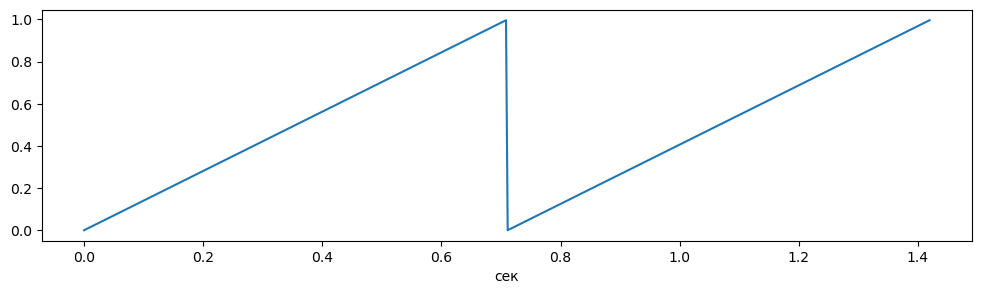

In [19]:
X = list(range(0, 512))
Y = [saw(x) for x in X]
X = [float(X[i])/360 for i in X]
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.xlabel('сек')
plt.show()

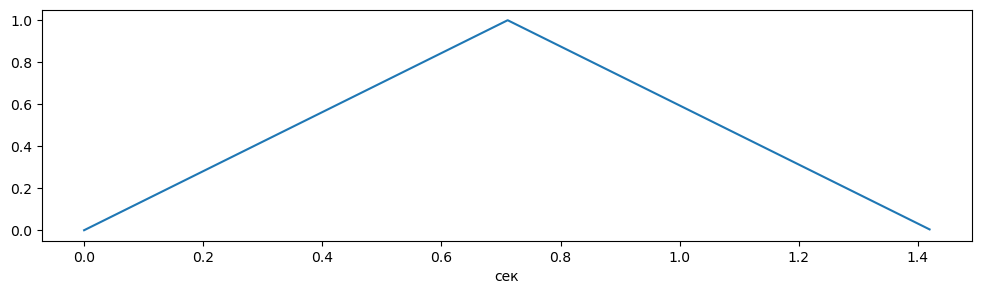

In [20]:
X = list(range(0, 512))
Y = [delta(x) for x in X]
X = [float(X[i])/360 for i in X]
plt.figure(figsize=(12, 3))
plt.plot(X, Y)
plt.xlabel('сек')
plt.show()

# Задание №3

In [21]:
def bit2(x, L):
    bit = [0]*L
    for i in range(L):
        if int(x) % 2 == 0:
            bit[(L - 1) - i] = 0
        else:
            bit[(L - 1) - i] = 1
        x = x / 2
    return(bit)

In [22]:
def ri(x, L):
    r = [0]*L
    l = L
    for i in range(L):
        if i == 0:
            r[i] = x[l - 1]
            l -= 1
        else:
            r[i] = x[l - 1] + x[l - 2]
            l -= 1
    return(r)

In [23]:
def vi(x, u):
    v = []
    n = []
    for i in range(len(x)):
        n = x[i]
        n = n[(u - 1):u]
        v.append(n)
    return(v)

In [24]:
def Adamar(x, L):
    z = 0
    w = bit2(x, L)
    r = ri(w, L)
    v = []
    for i in range(L):
        z = z + r[i] * v[i]
    if z % 2 == 0:
        out = 1
    else:
        out = -1
    return(out)

In [25]:
spiro2bit = [[0]*9]*512
for i in range(len(spiro2)):
    spiro2bit[i] = bit2(spiro[i], 9)

In [26]:
s = [1, 2, 0 ,3]
s

[1, 2, 0, 3]

In [28]:
s2 = []
for i in range(len(s)):
    s2.append(bit2(s[i],2))
s2

[[0, 1], [1, 0], [0, 0], [1, 1]]

In [29]:
r = []
for i in range(len(s2)):
    r.append(ri(s2[i],2))
r

[[1, 1], [0, 1], [0, 0], [1, 2]]

In [46]:
v = []
for i in range(len(s2[0])):
    v.append(vi(s2,i + 1))
v

[[[0], [1], [0], [1]], [[1], [0], [0], [1]]]

In [49]:
v[0][0]

[0]